# Importing Libraries and performing EDA

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
sns.set(color_codes=True)
%matplotlib inline

# loading the data into dataframe


In [29]:
df=pd.read_csv("C:\\Users\\WIN10\\Desktop\\data without infertility _final.csv")

In [30]:
df.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 42
0,1,10001,0,28,44.6,152.0,19.300000,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,10002,0,36,65.0,161.5,24.921163,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,10003,1,33,68.8,165.0,25.270891,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,10004,0,37,65.0,148.0,29.674945,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,10005,0,25,52.0,161.0,20.060954,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


In [31]:
df.tail()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 42
536,537,10537,0,35,50.0,164.592,18.5,17,72,16,...,0.0,0,110,70,1,0,17.5,10.0,6.7,NaN
537,538,10538,0,30,63.2,158.000,25.3,15,72,18,...,0.0,0,110,70,9,7,19.0,18.0,8.2,NaN
538,539,10539,0,36,54.0,152.000,23.4,13,74,20,...,0.0,0,110,80,1,0,18.0,9.0,7.3,NaN
539,540,10540,0,27,50.0,150.000,22.2,15,74,20,...,0.0,0,110,70,7,6,18.0,16.0,11.5,NaN
540,541,10541,1,23,82.0,165.000,30.1,13,80,20,...,1.0,0,120,70,9,10,19.0,18.0,6.9,NaN


# dropping irrelevant columns

In [32]:
#DELETING UNNECESSARY COLS
del df["Unnamed: 42"]
del df['Sl. No']
del df['Patient File No.']

# checking the types of data 

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PCOS (Y/N)             541 non-null    int64  
 1    Age (yrs)             541 non-null    int64  
 2   Weight (Kg)            541 non-null    float64
 3   Height(Cm)             541 non-null    float64
 4   BMI                    541 non-null    float64
 5   Blood Group            541 non-null    int64  
 6   Pulse rate(bpm)        541 non-null    int64  
 7   RR (breaths/min)       541 non-null    int64  
 8   Hb(g/dl)               541 non-null    float64
 9   Cycle(R/I)             541 non-null    int64  
 10  Cycle length(days)     541 non-null    int64  
 11  Marraige Status (Yrs)  540 non-null    float64
 12  Pregnant(Y/N)          541 non-null    int64  
 13  No. of aborptions      541 non-null    int64  
 14  FSH(mIU/mL)            541 non-null    float64
 15  LH(mIU

In [34]:
df["AMH(ng/mL)"] = pd.to_numeric(df["AMH(ng/mL)"], errors='coerce')

In [35]:
# CHECKING FOR MISSING VALUES
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()
print(df[df.isnull().any(axis=1)][null_columns])

     Marraige Status (Yrs)  AMH(ng/mL)  Fast food (Y/N)
156                    5.0        5.27              NaN
305                    9.0         NaN              0.0
458                    NaN        6.60              0.0


In [36]:
# REPLACING MISSING VALUES BY MEDIAN
df['Marraige Status (Yrs)'].fillna(df['Marraige Status (Yrs)'].median(),inplace=True)
df['AMH(ng/mL)'].fillna(df['AMH(ng/mL)'].median(),inplace=True)
df['Fast food (Y/N)'].fillna(df['Fast food (Y/N)'].median(),inplace=True)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40]),
 [Text(1, 0, 'PCOS (Y/N)'),
  Text(2, 0, ' Age (yrs)'),
  Text(3, 0, 'Weight (Kg)'),
  Text(4, 0, 'Height(Cm) '),
  Text(5, 0, 'BMI'),
  Text(6, 0, 'Blood Group'),
  Text(7, 0, 'Pulse rate(bpm) '),
  Text(8, 0, 'RR (breaths/min)'),
  Text(9, 0, 'Hb(g/dl)'),
  Text(10, 0, 'Cycle(R/I)'),
  Text(11, 0, 'Cycle length(days)'),
  Text(12, 0, 'Marraige Status (Yrs)'),
  Text(13, 0, 'Pregnant(Y/N)'),
  Text(14, 0, 'No. of aborptions'),
  Text(15, 0, 'FSH(mIU/mL)'),
  Text(16, 0, 'LH(mIU/mL)'),
  Text(17, 0, 'FSH/LH'),
  Text(18, 0, 'Hip(inch)'),
  Text(19, 0, 'Waist(inch)'),
  Text(20, 0, 'Waist:Hip Ratio'),
  Text(21, 0, 'TSH (mIU/L)'),
  Text(22, 0, 'AMH(ng/mL)'),
  Text(23, 0, 'PRL(ng/mL)'),
  Text(24, 0, 'Vit D3 (ng/mL)'),
  Text(25, 0, 'PRG(ng/mL)'),
  Text(26, 0, 'RBS(mg/dl)'),
  Text(27, 0, 'Weight gain(

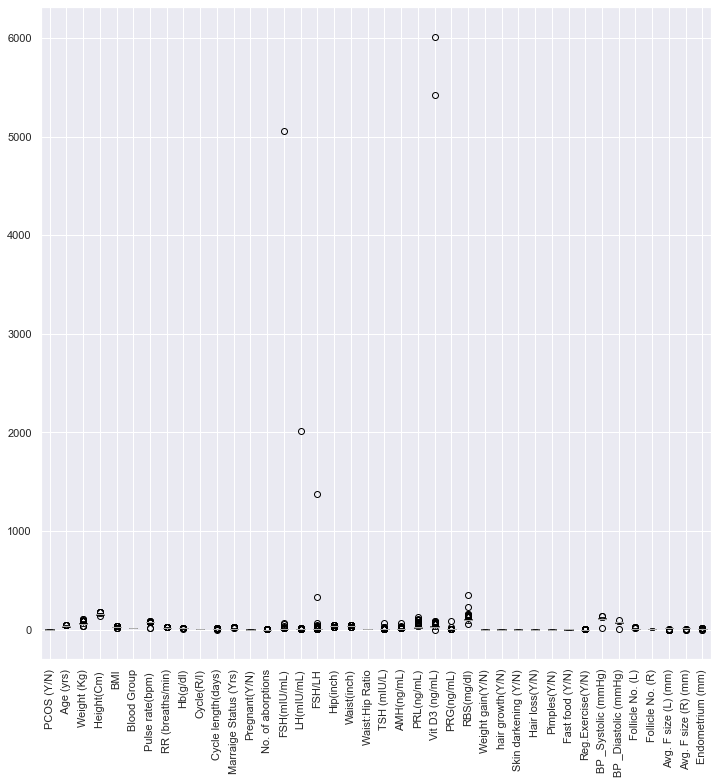

In [37]:
pd.DataFrame.boxplot(df, figsize=(12,12))
plt.xticks(rotation=90)

In [38]:
df.shape

(541, 40)

In [39]:
df.describe()

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,...,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,0.327172,31.430684,59.637153,156.484835,24.311285,13.802218,73.247689,19.243993,11.160037,2.560074,...,0.489834,0.515712,0.247689,114.661738,76.927911,6.129390,6.641405,15.018115,15.451701,8.475915
std,0.469615,5.411006,11.028287,6.033545,4.056399,1.840812,4.430285,1.688629,0.866904,0.901950,...,0.500359,0.500216,0.432070,7.384556,5.574112,4.229294,4.436889,3.566839,3.318848,2.165381
min,0.000000,20.000000,31.000000,137.000000,12.417882,11.000000,13.000000,16.000000,8.500000,2.000000,...,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,28.000000,52.000000,152.000000,21.641274,13.000000,72.000000,18.000000,10.500000,2.000000,...,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,0.000000,31.000000,59.000000,156.000000,24.238227,14.000000,72.000000,18.000000,11.000000,2.000000,...,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,1.000000,35.000000,65.000000,160.000000,26.634958,15.000000,74.000000,20.000000,11.700000,4.000000,...,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,14.800000,5.000000,...,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


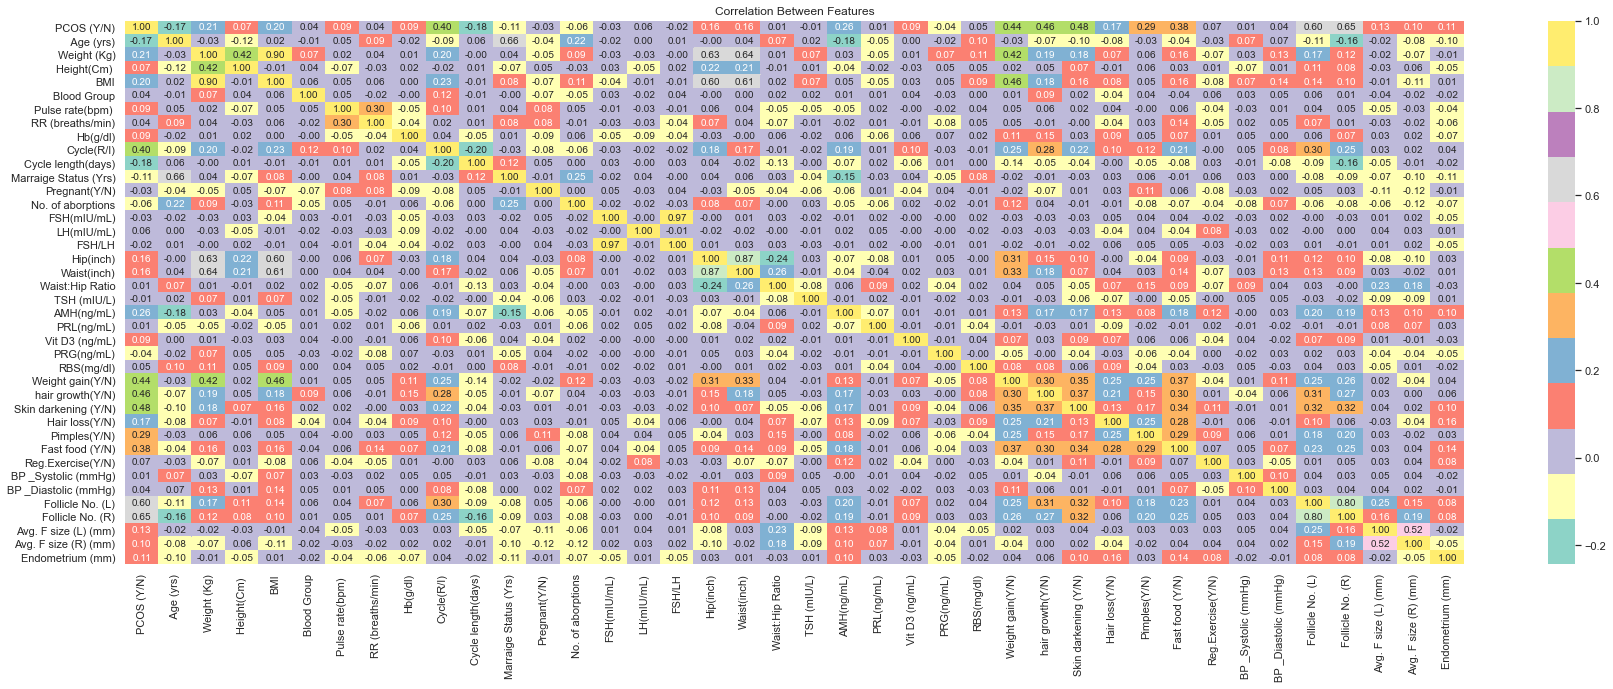

In [41]:
corr_matrix= df.corr()
plt.subplots(figsize=(30,10))
sns.heatmap(corr_matrix,cmap="Set3", annot = True, fmt = ".2f");
plt.title("Correlation Between Features")
plt.show()

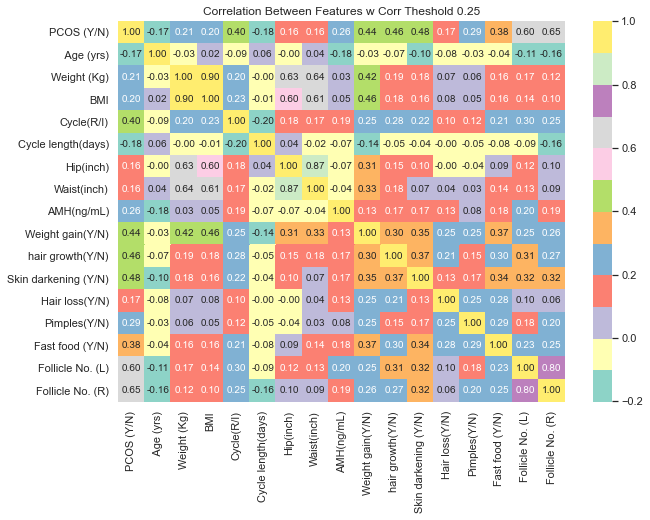

In [44]:
threshold = 0.15 
filtre = np.abs(corr_matrix["PCOS (Y/N)"]) > threshold 
corr_features = corr_matrix.columns[filtre].tolist()
plt.subplots(figsize=(10,7))
sns.heatmap(df[corr_features].corr(),cmap="Set3", annot = True, fmt = ".2f")
plt.title("Correlation Between Features w Corr Theshold 0.25")
plt.show()

# Modeling

# Train - Test Split


In [48]:
X= df.drop(columns=["PCOS (Y/N)"])
y = df["PCOS (Y/N)"].values
# implementing train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)


In [49]:
print("X_train",len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))

X_train 378
X_test 163
y_train 378
y_test 163


# Simple Logistic Regression


In [50]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
acc_log_train = round(logreg.score(X_train, y_train)*100,2) 
acc_log_test = round(logreg.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_log_train))
print("Testing Accuracy: % {}".format(acc_log_test))

Training Accuracy: % 89.42
Testing Accuracy: % 85.28


C:\Users\WIN10\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [57]:
!pip install mlxtend

In [59]:
pip install xgboost

In [63]:
pip install lightgbm

In [64]:

from collections import Counter
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost
import lightgbm
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score


ModuleNotFoundError: No module named 'catboost'

In [62]:
random_state = 42
classifier = [DecisionTreeClassifier(random_state = random_state),
             SVC(random_state = random_state),
             RandomForestClassifier(random_state = random_state),
             LogisticRegression(random_state = random_state),
             KNeighborsClassifier()]

dt_param_grid = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2)}

svc_param_grid = {"kernel" : ["rbf"],
                 "gamma": [0.001, 0.01, 0.1, 1],
                 "C": [1,10,50,100,200,300,1000]}

rf_param_grid = {"max_features": ['auto', 'sqrt', 'log2'],
                "n_estimators":[300,500],
                "criterion":["gini"],
                'max_depth' : [4,5,6,7,8,9,10,12],}

logreg_param_grid = {"C":np.logspace(-3,3,7),
                    "penalty": ["l1","l2"]}

knn_param_grid = {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}


classifier_param = [dt_param_grid,
                   svc_param_grid,
                   rf_param_grid,
                   logreg_param_grid,
                   knn_param_grid]

In [65]:
cv_result = []
best_estimators = []
for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i], param_grid=classifier_param[i], cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1,verbose = 1)
    clf.fit(X_train,y_train)
    cv_result.append(round(clf.best_score_*100,2))
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

Fitting 10 folds for each of 250 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:   22.8s
[Parallel(n_jobs=-1)]: Done 1176 tasks      | elapsed:   29.3s
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:   36.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


85.18
Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


80.43
Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   23.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  4.7min finished


91.8
Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 133 out of 140 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    2.3s finished
C:\Users\WIN10\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


86.76
Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    1.5s


80.43


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    2.9s finished


In [68]:
best_estimators

[DecisionTreeClassifier(max_depth=3, min_samples_split=10, random_state=42),
 SVC(C=1, gamma=0.001, random_state=42),
 RandomForestClassifier(max_depth=12, n_estimators=500, random_state=42),
 LogisticRegression(C=10.0, random_state=42),
 KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights='distance')]

In [69]:
dt = best_estimators[0]
svm = best_estimators[1]
rf = best_estimators[2]
lr = best_estimators[3]
knn = best_estimators[4]

In [70]:
model_list = ['Decision Tree','SVC','RandomForest','Logistic Regression','KNearestNeighbours']

In [74]:
pip install plotly

In [83]:
import plotly.graph_objects as go
# create trace1
trace1 = go.Bar(
                x = model_list,
                y = cv_result,
                marker = dict(color = 'rgb(0, 128, 128)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(title = 'Accuracy of different Classifier Models' , xaxis = dict(title = 'Classifier Models'), yaxis = dict(title = '% of Accuracy'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

In [78]:
model = [dt,svm,rf,lr,knn]
predictions = []

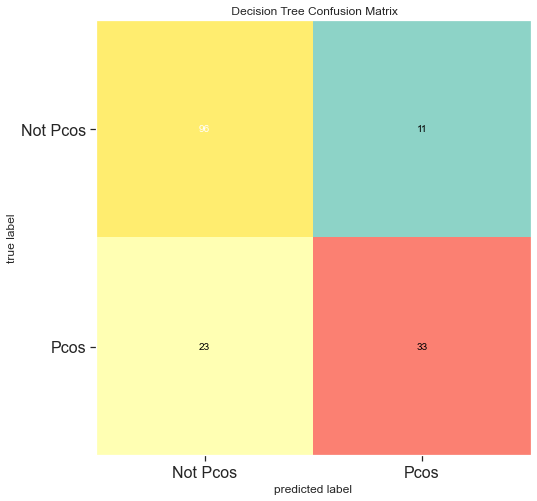

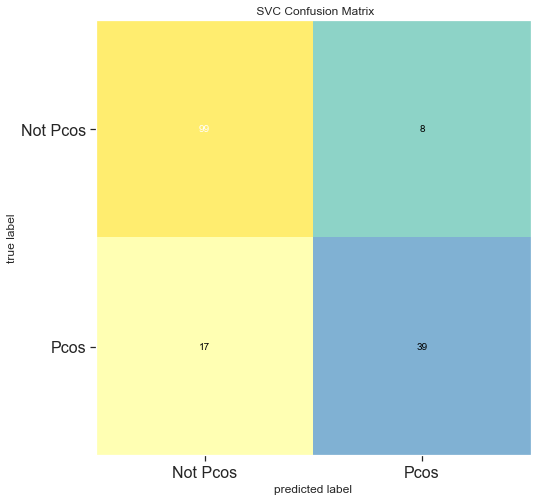

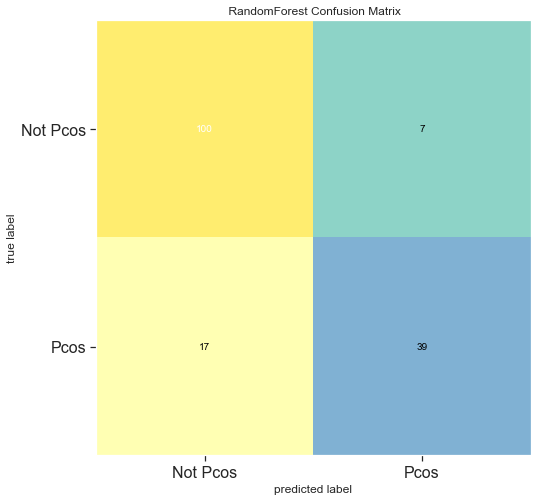

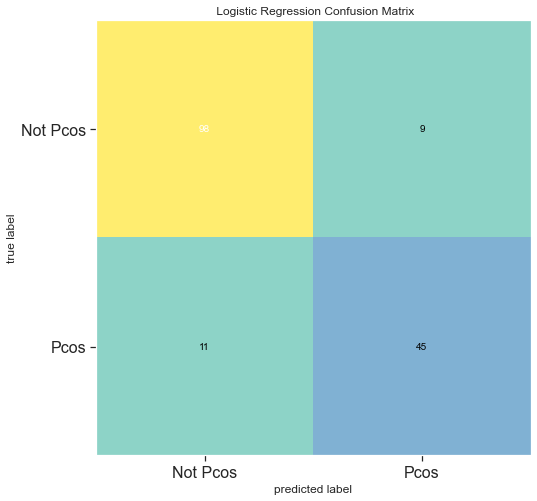

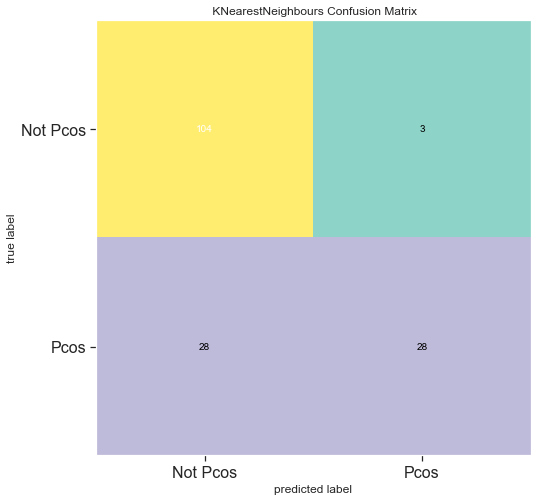

IndexError: list index out of range

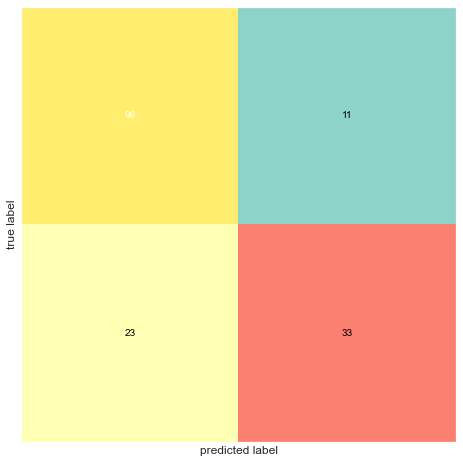

In [81]:
for i in model:
    predictions.append(i.predict(X_test))
for j in range(7):
    cm = confusion_matrix(y_test, predictions[j])
    plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Set3)
    plt.title(" {} Confusion Matrix".format(model_list[j]))
    plt.xticks(range(2), ["Not Pcos","Pcos"], fontsize=16)
    plt.yticks(range(2), ["Not Pcos","Pcos"], fontsize=16)
    plt.show()